<a href="https://colab.research.google.com/github/sabshaik27/Machine-Learning/blob/main/Model_Selection_or_Cross_Validation/Grid_Search/Grid_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#conda install -c anaconda py-xgboost

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# Importing the dataset
dataset = pd.read_csv('LR.csv')
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 2].values


In [4]:
#Training and Testing Data (divide the data into two part)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [6]:
from sklearn.svm import SVC
classifer=SVC(kernel='rbf',random_state=0,gamma=0.3)
classifer.fit(X_train,y_train)


SVC(gamma=0.3, random_state=0)

In [7]:
y_pred = classifer.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred)

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.93

In [10]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator =classifer,X =X_train, y= y_train, cv= 10)
accuracies.mean()
accuracies.std()

np.float64(0.053748384988656986)

In [11]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1,10,100,1000],'kernel' : ['linear']},
               {'C': [1,10,100,1000],'kernel': ['rbf'],
                'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7]
                    }]

In [12]:
grid_search = GridSearchCV(estimator=classifer, param_grid=parameters, scoring ='accuracy', cv=10,n_jobs=1 )
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

/tmp/ipython-input-3524794650.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


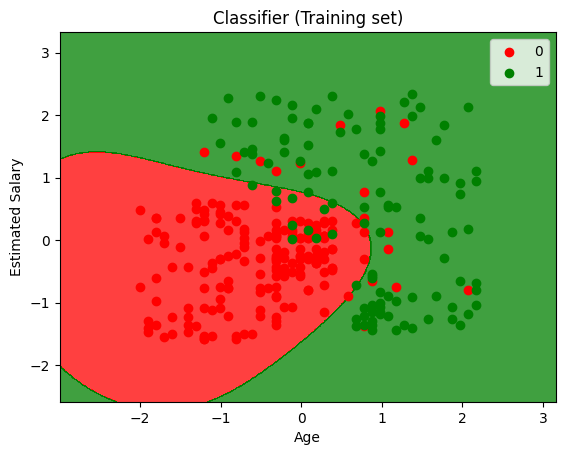

In [13]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifer.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

/tmp/ipython-input-443252395.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


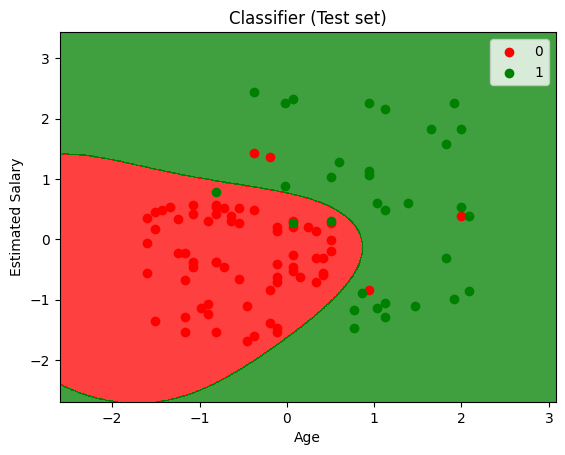

In [14]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifer.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()